Задача состоит в том, чтобы для каждого action_id в action_test предсказать result как float от 0 до 1. Файл должен содержать заголовок «action_id, result». Метрика оценки ROC.

Файл person содержит всех уникальных людей (и соответствующие характеристики), которые выполняли действия с течением времени. Каждая строка в файле представляет уникального человека. У каждого человека есть уникальный person_id.

Файл action_train содержит все уникальные действия (и соответствующие характеристики действий), которые каждый человек выполнял в течение определенного времени. Каждая строка в файле действий представляет собой уникальное действие, выполненное человеком в определенный день. Каждое действие имеет уникальный идентификатор action_id. В файле содержится несколько различных категорий действий. Действия типа 1 отличаются от действий типа 2-7, поскольку известно больше характеристик, связанных с действиями типа 1 (всего девять), чем с действиями типа 2-7 (которые имеют только одну связанную характеристику).


#import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip /content/drive/MyDrive/ml_data/sber_test/task.zip

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
action_test = '/content/action_test.csv'
action_train = '/content/action_train.csv'
person = '/content/person.csv'

In [ ]:
pd.set_option('display.max_columns', None)

# person_df

In [ ]:
person_df = pd.read_csv(person, index_col='Unnamed: 0')

In [ ]:
person_df.head(5)

,person_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,type 2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,84


In [ ]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189118 entries, 0 to 189117
Data columns (total 41 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  189118 non-null  object
 1   char_1     189118 non-null  object
 2   group_1    189118 non-null  object
 3   char_2     189118 non-null  object
 4   date       189118 non-null  object
 5   char_3     189118 non-null  object
 6   char_4     189118 non-null  object
 7   char_5     189118 non-null  object
 8   char_6     189118 non-null  object
 9   char_7     189118 non-null  object
 10  char_8     189118 non-null  object
 11  char_9     189118 non-null  object
 12  char_10    189118 non-null  bool  
 13  char_11    189118 non-null  bool  
 14  char_12    189118 non-null  bool  
 15  char_13    189118 non-null  bool  
 16  char_14    189118 non-null  bool  
 17  char_15    189118 non-null  bool  
 18  char_16    189118 non-null  bool  
 19  char_17    189118 non-null  bool  
 20  char

In [ ]:
person_df['date'] = pd.to_datetime(person_df['date'])

In [ ]:
person_df.isna().mean()

person_id    0.0
char_1       0.0
group_1      0.0
char_2       0.0
date         0.0
char_3       0.0
char_4       0.0
char_5       0.0
char_6       0.0
char_7       0.0
char_8       0.0
char_9       0.0
char_10      0.0
char_11      0.0
char_12      0.0
char_13      0.0
char_14      0.0
char_15      0.0
char_16      0.0
char_17      0.0
char_18      0.0
char_19      0.0
char_20      0.0
char_21      0.0
char_22      0.0
char_23      0.0
char_24      0.0
char_25      0.0
char_26      0.0
char_27      0.0
char_28      0.0
char_29      0.0
char_30      0.0
char_31      0.0
char_32      0.0
char_33      0.0
char_34      0.0
char_35      0.0
char_36      0.0
char_37      0.0
char_38      0.0
dtype: float64

In [ ]:
person_df['person_id'].nunique()

189118

In [ ]:
person_df.nunique()

person_id    189118
char_1            2
group_1       34224
char_2            3
date           1196
char_3           43
char_4           25
char_5            9
char_6            7
char_7           25
char_8            8
char_9            9
char_10           2
char_11           2
char_12           2
char_13           2
char_14           2
char_15           2
char_16           2
char_17           2
char_18           2
char_19           2
char_20           2
char_21           2
char_22           2
char_23           2
char_24           2
char_25           2
char_26           2
char_27           2
char_28           2
char_29           2
char_30           2
char_31           2
char_32           2
char_33           2
char_34           2
char_35           2
char_36           2
char_37           2
char_38         101
dtype: int64

In [ ]:
person_df['date'].agg(['min', 'max', 'mean'])

min    2020-05-18 00:00:00.000000000
max    2023-08-31 00:00:00.000000000
mean   2022-08-23 13:37:43.310736896
Name: date, dtype: datetime64[ns]

нет пропусков

#action_train_df

In [ ]:
action_train_df = pd.read_csv(action_train, index_col='Unnamed: 0')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
action_train_df.head()

,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,result
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [ ]:
action_train_df['date'] = pd.to_datetime(action_train_df['date'])

In [ ]:
action_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197291 entries, 0 to 2197290
Data columns (total 15 columns):
 #   Column       Dtype         
---  ------       -----         
 0   person_id    object        
 1   action_id    object        
 2   date         datetime64[ns]
 3   action_type  object        
 4   char_1       object        
 5   char_2       object        
 6   char_3       object        
 7   char_4       object        
 8   char_5       object        
 9   char_6       object        
 10  char_7       object        
 11  char_8       object        
 12  char_9       object        
 13  char_10      object        
 14  result       int64         
dtypes: datetime64[ns](1), int64(1), object(13)
memory usage: 268.2+ MB


In [ ]:
action_train_df.isna().mean()

person_id      0.000000
action_id      0.000000
date           0.000000
action_type    0.000000
char_1         0.928268
char_2         0.928268
char_3         0.928268
char_4         0.928268
char_5         0.928268
char_6         0.928268
char_7         0.928268
char_8         0.928268
char_9         0.928268
char_10        0.071732
result         0.000000
dtype: float64

In [ ]:
action_train_df[action_train_df['action_type']=='type 1'].isna().mean()

person_id      0.0
action_id      0.0
date           0.0
action_type    0.0
char_1         0.0
char_2         0.0
char_3         0.0
char_4         0.0
char_5         0.0
char_6         0.0
char_7         0.0
char_8         0.0
char_9         0.0
char_10        1.0
result         0.0
dtype: float64

In [ ]:
action_train_df[action_train_df['action_type']!='type 1'].isna().mean()

person_id      0.0
action_id      0.0
date           0.0
action_type    0.0
char_1         1.0
char_2         1.0
char_3         1.0
char_4         1.0
char_5         1.0
char_6         1.0
char_7         1.0
char_8         1.0
char_9         1.0
char_10        0.0
result         0.0
dtype: float64

In [ ]:
action_train_df['result'].value_counts(normalize=True)

0    0.556046
1    0.443954
Name: result, dtype: float64

Хороший баланс классов, также нет пропусков в данных.  
Те пропуски, что присутствуют, описаны в задании тк, для класса action_type 1 собрано больше информации нежели для остальных классов 

# action_test

In [ ]:
action_test_df = pd.read_csv(action_test, index_col='Unnamed: 0')

In [ ]:
action_test_df.shape

(498687, 14)

# Merge data

In [ ]:
df = action_train_df.merge(person_df, how = 'inner', on='person_id', suffixes=('_action', '_person'),)

In [ ]:
df.columns

Index(['person_id', 'action_id', 'date_action', 'action_type', 'char_1_action',
       'char_2_action', 'char_3_action', 'char_4_action', 'char_5_action',
       'char_6_action', 'char_7_action', 'char_8_action', 'char_9_action',
       'char_10_action', 'result', 'char_1_person', 'group_1', 'char_2_person',
       'date_person', 'char_3_person', 'char_4_person', 'char_5_person',
       'char_6_person', 'char_7_person', 'char_8_person', 'char_9_person',
       'char_10_person', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
       'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
       'char_34', 'char_35', 'char_36', 'char_37', 'char_38'],
      dtype='object')

In [ ]:
action_train_df.shape, df.shape

((2197291, 15), (2197291, 55))

#EDA

In [ ]:
cm = sns.dark_palette('green', as_cmap=True)
df.corr().style.background_gradient(cmap=cm)

,result,char_10_person,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
result,1.000000,0.269019,0.226259,0.224944,0.322046,0.247602,0.263966,0.278637,0.286896,0.211444,0.279465,0.270558,0.278748,0.285977,0.271276,0.221353,0.288832,0.172723,0.234790,0.277762,0.187893,0.210634,0.253803,0.278900,0.213261,0.313514,0.215065,0.316339,0.289306,0.676527
char_10_person,0.269019,1.000000,0.612842,0.638195,0.702474,0.601360,0.663621,0.738883,0.708305,0.596380,0.702357,0.652965,0.698299,0.672914,0.662115,0.622952,0.586784,0.616147,0.721279,0.706904,0.548177,0.650632,0.633843,0.690529,0.631735,0.661669,0.595945,0.713198,0.707365,0.450717
char_11,0.226259,0.612842,1.000000,0.557612,0.629460,0.547685,0.698368,0.673291,0.670669,0.579098,0.696794,0.658651,0.712255,0.733551,0.748938,0.690967,0.581882,0.549967,0.493031,0.695012,0.495116,0.545136,0.501113,0.675679,0.545807,0.661516,0.517421,0.646264,0.708473,0.400573
char_12,0.224944,0.638195,0.557612,1.000000,0.672657,0.759860,0.647571,0.632414,0.666674,0.553274,0.608730,0.505629,0.595953,0.614612,0.624753,0.533278,0.564180,0.707647,0.733718,0.607660,0.661239,0.722682,0.730331,0.587630,0.761395,0.639541,0.684492,0.643960,0.598328,0.400239
char_13,0.322046,0.702474,0.629460,0.672657,1.000000,0.679005,0.714388,0.743664,0.761259,0.596560,0.821108,0.645363,0.737282,0.739676,0.748880,0.607529,0.635530,0.581731,0.652972,0.747440,0.546625,0.626074,0.687864,0.714630,0.644435,0.774327,0.590666,0.807054,0.749959,0.504372
char_14,0.247602,0.601360,0.547685,0.759860,0.679005,1.000000,0.668079,0.627001,0.693671,0.540477,0.601087,0.491775,0.609930,0.626731,0.624844,0.531419,0.579711,0.658528,0.689301,0.620537,0.657960,0.709716,0.719217,0.644037,0.717960,0.678709,0.706222,0.692600,0.620655,0.420742
char_15,0.263966,0.663621,0.698368,0.647571,0.714388,0.668079,1.000000,0.727753,0.757906,0.594278,0.710342,0.658452,0.719978,0.748925,0.769034,0.652357,0.627844,0.588724,0.605943,0.726941,0.556798,0.618477,0.618646,0.710788,0.617362,0.819516,0.581664,0.740344,0.734890,0.444610
char_16,0.278637,0.738883,0.673291,0.632414,0.743664,0.627001,0.727753,1.000000,0.745872,0.626411,0.749682,0.835214,0.751086,0.730392,0.728331,0.667071,0.610713,0.600957,0.646054,0.757201,0.572333,0.646057,0.638102,0.701582,0.624954,0.715818,0.597061,0.758506,0.750234,0.460127
char_17,0.286896,0.708305,0.670669,0.666674,0.761259,0.693671,0.757906,0.745872,1.000000,0.625728,0.739442,0.672195,0.743512,0.749762,0.765617,0.651883,0.645279,0.609148,0.635360,0.746000,0.592627,0.642001,0.645443,0.754962,0.638081,0.752967,0.609500,0.771858,0.755613,0.467055
char_18,0.211444,0.596380,0.579098,0.553274,0.596560,0.540477,0.594278,0.626411,0.625728,1.000000,0.634368,0.552584,0.607906,0.603842,0.611789,0.530471,0.529082,0.518967,0.509392,0.606092,0.658432,0.530593,0.510675,0.647207,0.496707,0.575530,0.533215,0.605995,0.618839,0.392413


Высокий коэффицент корреляции между целевой переменной и переменной 'char_38' ~0,68.  
Возможно это будет главным признаком для посторения моедлей

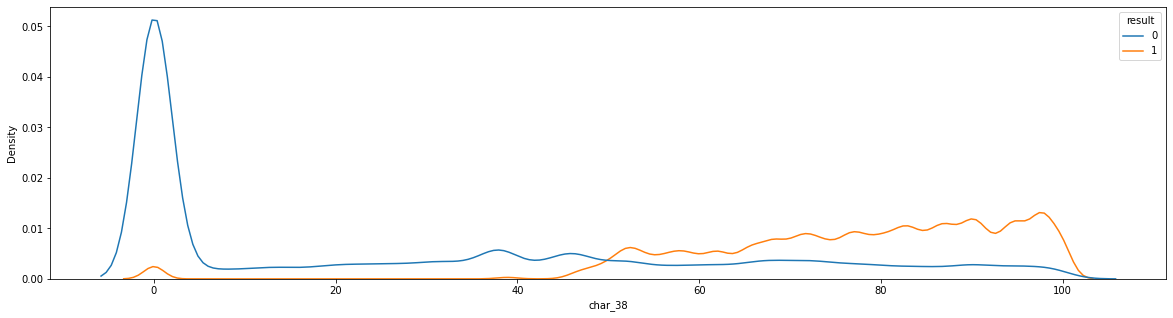

In [ ]:
sns.kdeplot(data=df, x='char_38', hue='result')

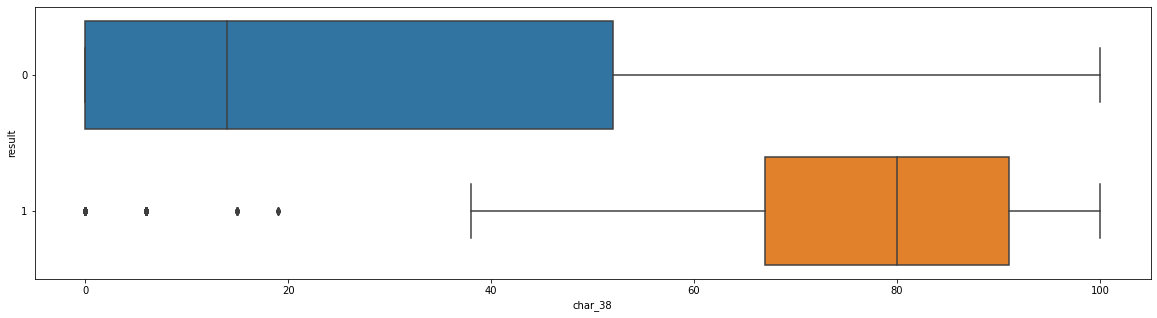

In [ ]:
sns.boxplot(data=df, x='char_38', y='result',orient='h')

Распределения для класса 1 и 0 практически не пересекаются.  
Возможно даже на одном это пизнаке можно получить хорошую модель.  
Даже при визуальном анализе можно представить прямую разделяющую выборку на 2 класса.

In [ ]:
pers_gr = action_train_df.groupby('person_id')['result'].agg(['count', 'mean'])
pers_gr.sort_values(by='count', ascending=False).head(50)

,count,mean
person_id,,
ppl_294918,55103,0.000000
ppl_370270,53668,0.000224
ppl_105739,45936,0.000000
ppl_54699,23969,0.000000
ppl_64887,7052,0.999858
ppl_250020,4293,0.000000
ppl_351668,3144,0.000000
ppl_36839,3059,0.000000
ppl_372923,2365,0.000000


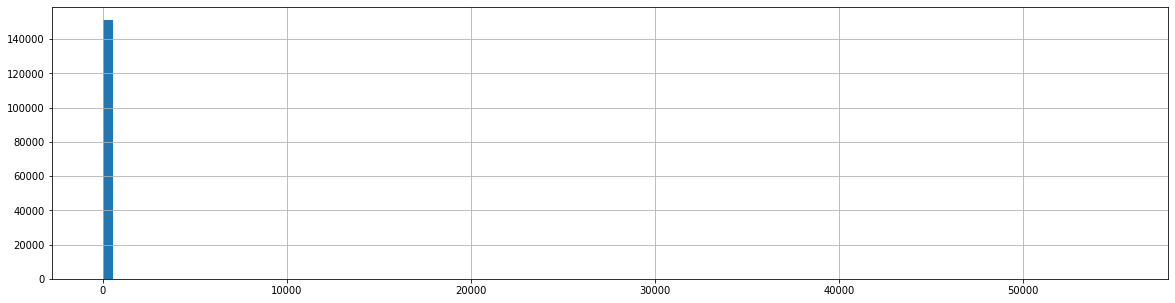

In [ ]:
pers_gr['count'].hist(bins=100)

In [ ]:
pers_gr['count'].median(), pers_gr['count'].mean()

(5.0, 14.523222842790574)

Имеем ирнохвостовое распередение операций, в следствии чего получаем сильно смещенное среднее(14.5) относительно миедианы(5).  
Большинство пользователей совершают малое колличество операций.  
Возможно это какие-то бизнс аккаунты, боты мб еще что-то схожего типа.

In [ ]:
pers_gr.reset_index()[['person_id', 'mean']]

,person_id,mean
0,ppl_100,0.0
1,ppl_100002,1.0
2,ppl_100003,1.0
3,ppl_100006,1.0
4,ppl_100013,1.0
...,...,...
151290,ppl_99981,0.0
151291,ppl_99987,1.0
151292,ppl_9999,0.0
151293,ppl_99992,0.0


In [ ]:
df = df.merge(pers_gr.reset_index()[['person_id', 'count']], how = 'inner', on='person_id')

In [ ]:
df['count_cut'] = pd.cut(df['count'],
                         pd.IntervalIndex.from_tuples([(0, 100), (100, 1000), (1000, 10000), (10000, np.inf)]))

In [ ]:
df.groupby('count_cut')['result'].agg(['mean', 'std','count'])

,mean,std,count
count_cut,,,
"(0.0, 100.0]",0.468676,0.499018,1616925
"(100.0, 1000.0]",0.554256,0.497048,377322
"(1000.0, 10000.0]",0.350378,0.477098,24368
"(10000.0, inf]",0.000067,0.008195,178676


Количество совершенных операций также может помочь в классификации

In [ ]:
pers_gr['mean'].value_counts(normalize=True)

0.000000    0.545451
1.000000    0.410556
0.500000    0.002783
0.666667    0.001666
0.333333    0.001619
              ...   
0.514286    0.000007
0.656250    0.000007
0.974138    0.000007
0.358491    0.000007
0.759162    0.000007
Name: mean, Length: 1486, dtype: float64

Пользователи в ~96% случаев относятся либо к классу 1 или 0, и всего в 4% могут изменять значения класса с 1 на 0 или с 0 на 1 

In [ ]:
df['char_38_cut'] = pd.cut(df['char_38'], 5)

In [ ]:
df.groupby(['count_cut', 'char_38_cut'])['result'].agg(['mean','count']).unstack()

mean                                         \
char_38_cut       (-0.1, 20.0] (20.0, 40.0] (40.0, 60.0] (60.0, 80.0]   
count_cut                                                               
(0.0, 100.0]          0.027409     0.003352     0.466478     0.695516   
(100.0, 1000.0]       0.052043     0.096156     0.534320     0.690471   
(1000.0, 10000.0]     0.000000          NaN          NaN     0.999858   
(10000.0, inf]        0.000078     0.000000          NaN          NaN   

                                       count                            \
char_38_cut       (80.0, 100.0] (-0.1, 20.0] (20.0, 40.0] (40.0, 60.0]   
count_cut                                                                
(0.0, 100.0]           0.817656       420621       129476       234127   
(100.0, 1000.0]        0.781810        67386        15038        66681   
(1000.0, 10000.0]      1.000000        15829            0            0   
(10000.0, inf]              NaN       154707        23969            0   

                                              
char_38_cut       (60.0, 80.0] (80.0, 100.0]  
count_cut                                     
(0.0, 100.0]            362101        470600  
(100.0, 1000.0]         108074        120143  
(1000.0, 10000.0]         7052          1487  
(10000.0, inf]               0             0

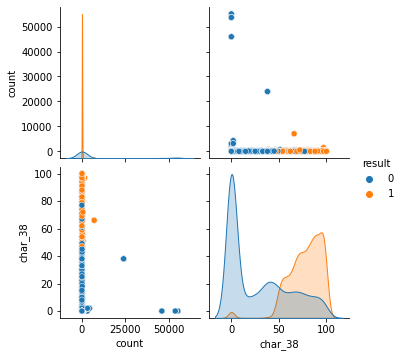

In [ ]:
sns.pairplot(df[['count','char_38', 'result']].sample(10000), hue='result')

In [ ]:
df[['count','char_38', 'result']].corr()

,count,char_38,result
count,1.000000,-0.383116,-0.258804
char_38,-0.383116,1.000000,0.676527
result,-0.258804,0.676527,1.000000


In [ ]:
df.groupby('action_type')['result'].agg(['mean', 'count'])

,mean,count
action_type,,
type 1,0.411325,157615
type 2,0.510324,904683
type 3,0.251989,429408
type 4,0.489205,207465
type 5,0.480243,490710
type 6,0.555843,4253
type 7,0.399747,3157


In [ ]:
trsh=0.3

In [ ]:
for i in range(1, 10):
  print(f'char_{i}_action количество классов отличающихся от среднего целевой переменной > {trsh} :', 
        (abs(df[df['action_type']=='type 1'].groupby(f'char_{i}_action')['result'].agg(['mean', 'count'])['mean']-0.5)>trsh).sum(),
        'из', df[df['action_type']=='type 1'].groupby(f'char_{i}_action')['result'].agg(['mean', 'count']).shape[0])
  
print(f'char_{10}_action количество классов отличающихся от среднего целевой переменной > {trsh} :', 
      (abs(df[df['action_type']!='type 1'].groupby(f'char_{10}_action')['result'].agg(['mean', 'count'])['mean']-0.5)>trsh).sum(),
      'из', df[df['action_type']!='type 1'].groupby(f'char_{10}_action')['result'].agg(['mean', 'count']).shape[0])

char_1_action количество классов отличающихся от среднего целевой переменной > 0.3 : 9 из 51
char_2_action количество классов отличающихся от среднего целевой переменной > 0.3 : 2 из 32
char_3_action количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 11
char_4_action количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 7
char_5_action количество классов отличающихся от среднего целевой переменной > 0.3 : 1 из 7
char_6_action количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 5
char_7_action количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 8
char_8_action количество классов отличающихся от среднего целевой переменной > 0.3 : 1 из 18
char_9_action количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 19
char_10_action количество классов отличающихся от среднего целевой переменной > 0.3 : 3699 из 6515


In [ ]:
for i in range(1, 11):
  print(f'char_{i}_person количество классов отличающихся от среднего целевой переменной > {trsh} :',
        (abs(df.groupby(f'char_{i}_person')['result'].agg(['mean', 'count'])['mean']-0.5)>trsh).sum(),
        'из', df.groupby(f'char_{i}_person')['result'].agg(['mean', 'count']).shape[0])

char_1_person количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 2
char_2_person количество классов отличающихся от среднего целевой переменной > 0.3 : 1 из 3
char_3_person количество классов отличающихся от среднего целевой переменной > 0.3 : 3 из 43
char_4_person количество классов отличающихся от среднего целевой переменной > 0.3 : 2 из 25
char_5_person количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 9
char_6_person количество классов отличающихся от среднего целевой переменной > 0.3 : 2 из 7
char_7_person количество классов отличающихся от среднего целевой переменной > 0.3 : 6 из 25
char_8_person количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 8
char_9_person количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 9
char_10_person количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 2


In [ ]:
for i in range(11, 39):
  print(f'char_{i} количество классов отличающихся от среднего целевой переменной > {trsh} :',
        (abs(df.groupby(f'char_{i}')['result'].agg(['mean', 'count'])['mean']-0.5)>trsh).sum(),
        'из', df.groupby(f'char_{i}')['result'].agg(['mean', 'count']).shape[0])

char_11 количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 2
char_12 количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 2
char_13 количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 2
char_14 количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 2
char_15 количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 2
char_16 количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 2
char_17 количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 2
char_18 количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 2
char_19 количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 2
char_20 количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 2
char_21 количество классов отличающихся от среднего целевой переменной > 0.3 : 0 из 2
char_22 количество классов отличающихся от среднего це

Также имеем для посторения модели могут быть хороши столбцы char_10_action, char_6_person, char_7_person и char_38

In [ ]:
print(f'group_1 количество классов отличающихся от среднего целевой переменной > {trsh} :',
      (abs(df.groupby(f'group_1')['result'].agg(['mean', 'count'])['mean']-0.5)>trsh).sum(),
      'из', df.groupby(f'group_1')['result'].agg(['mean', 'count']).shape[0])

group_1 количество классов отличающихся от среднего целевой переменной > 0.3 : 27673 из 29899


group_1 признак в котором много классов отличающихся от среднего значения, может быть сильным признаком модели

In [ ]:
df['date_action_y_m'] = df['date_action'].values.astype('datetime64[M]')

In [ ]:
df.groupby('date_action_y_m')['result'].agg(['mean', 'count'])

,mean,count
date_action_y_m,,
2022-07-01,0.473061,49556
2022-08-01,0.496594,125076
2022-09-01,0.384952,293021
2022-10-01,0.345893,356775
2022-11-01,0.470517,215922
2022-12-01,0.465538,83701
2023-01-01,0.480813,158153
2023-02-01,0.493907,194498
2023-03-01,0.488058,168066


In [ ]:
df['date_person_y_m'] = df['date_person'].values.astype('datetime64[M]')

In [ ]:
df.groupby('date_person_y_m')['result'].agg(['mean', 'count'])

,mean,count
date_person_y_m,,
2020-05-01,0.441085,16668
2020-06-01,0.448562,27013
2020-07-01,0.436923,20372
2020-08-01,0.496286,18848
2020-09-01,0.479869,14927
2020-10-01,0.175549,47001
2020-11-01,0.583062,29436
2020-12-01,0.446724,25002
2021-01-01,0.475772,24104


Если столбец date_action не так интересен, то в date_person есть сильно отличающиеся месяца 

#Train_test_slit

In [ ]:
df = action_train_df.merge(person_df, how = 'inner', on='person_id', suffixes=('_action', '_person'),)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
p_train, p_test = train_test_split(df['person_id'].unique(), train_size=0.8, random_state=17)
p_train = pd.DataFrame(p_train, columns=['person_id',])
p_test = pd.DataFrame(p_test, columns=['person_id',])

In [ ]:
X_train = df.merge(p_train, how = 'inner', on='person_id').drop('result', axis=1)
y_train = df.merge(p_train, how = 'inner', on='person_id')['result']

In [ ]:
X_test = df.merge(p_test, how = 'inner', on='person_id').drop('result', axis=1)
y_test = df.merge(p_test, how = 'inner', on='person_id')['result']

#LR

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings(action='ignore')

In [ ]:
def make_lr(X_train, y_train, X_test, y_test, cat_features, num_features, iter=100, one_st_it = 1):
  train_roc = []
  test_roc = []

  lr = SGDClassifier(penalty='l2',
                     loss='log',
                     learning_rate='constant',
                     eta0=0.01,
                     max_iter=one_st_it,
                     n_jobs=-1,
                     warm_start=True,
                     random_state=17
                     )
  
  trans = ColumnTransformer(
      transformers=[
          ('ohe', OneHotEncoder(handle_unknown='ignore'), cat_features),
          ('std_sc', StandardScaler(), num_features) 
      ])
  
  X_train_1 = trans.fit_transform(X_train)
  X_test_1 = trans.transform(X_test)

  for i in tqdm(range(0, iter, one_st_it)):
    lr.fit(X_train_1, y_train)

    y_train_pred = lr.predict_proba(X_train_1)
    train_roc.append(roc_auc_score(y_train, y_train_pred[:,1]))

    y_test_pred = lr.predict_proba(X_test_1)
    test_roc.append(roc_auc_score(y_test, y_test_pred[:,1]))

  it = list(range(one_st_it, iter+1, one_st_it))
  plt.plot(it, train_roc, label='Train ROC AUC')
  plt.plot(it, test_roc, label='Test ROC AUC', color='r')
  plt.legend()

  max_ind = test_roc.index(max(test_roc))
  print(f'Best Test ROC AUC = {test_roc[max_ind]}')
  print(f'Best Train ROC AUC = {train_roc[max_ind]}')
  print(f'Best Itre = {(max_ind + 1)*one_st_it}')

  feat_imp = pd.DataFrame(zip(trans.get_feature_names_out(), lr.coef_.reshape(-1)))
  return feat_imp.sort_values(by=1, ascending=False), trans, lr

In [ ]:
X_train = X_train.fillna('unn')
X_test = X_test.fillna('unn')

In [ ]:
X_train['date_action_y_m'] = X_train['date_action'].values.astype('datetime64[M]')
X_test['date_action_y_m'] = X_test['date_action'].values.astype('datetime64[M]')

In [ ]:
X_train['date_person_y_m'] = X_train['date_person'].values.astype('datetime64[M]')
X_test['date_person_y_m'] = X_test['date_person'].values.astype('datetime64[M]')

In [ ]:
person_id_count = action_train_df[['person_id', 'action_id']].copy()
person_id_count = person_id_count.append(action_test_df[['person_id', 'action_id']].copy())
person_id_count = person_id_count.groupby('person_id')['action_id'].agg('count')

In [ ]:
X_train['pers_oper'] = X_train['person_id'].apply(lambda x: person_id_count[x])

In [ ]:
X_test['pers_oper'] = X_test['person_id'].apply(lambda x: person_id_count[x])

In [ ]:
cat_features = [
                #'person_id',
                #'action_id',
                #'date_action',
                'date_action_y_m',
                'action_type',
                'char_1_action',
                'char_2_action',
                'char_3_action',
                'char_4_action',
                'char_5_action',
                'char_6_action',
                'char_7_action',
                'char_8_action',
                'char_9_action',
                'char_10_action',
                'char_1_person',
                'group_1',
                'char_2_person',
                #'date_person',
                'date_person_y_m',
                'char_3_person',
                'char_4_person',
                'char_5_person',
                'char_6_person',
                'char_7_person',
                'char_8_person',
                'char_9_person',
                ]

In [ ]:
num_features = [
                'pers_oper',
                'char_10_person',
                'char_11',
                'char_12',
                'char_13',
                'char_14',
                'char_15',
                'char_16',
                'char_17',
                'char_18',
                'char_19',
                'char_20',
                'char_21',
                'char_22',
                'char_23',
                'char_24',
                'char_25',
                'char_26',
                'char_27',
                'char_28',
                'char_29',
                'char_30',
                'char_31',
                'char_32',
                'char_33',
                'char_34',
                'char_35',
                'char_36',
                'char_37',
                'char_38',
                ]

  0%|          | 0/100 [00:00<?, ?it/s]

Best Test ROC AUC = 0.9202588182503295
Best Train ROC AUC = 0.9536131176360884
Best Itre = 6


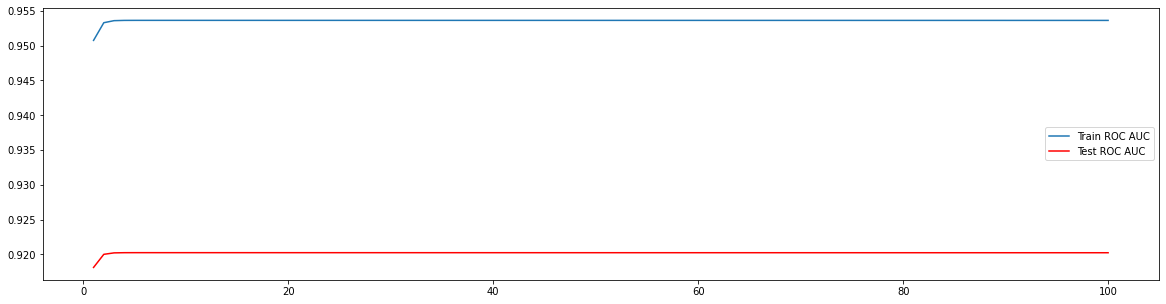

In [ ]:
f_imp, trans, lr = make_lr(X_train, y_train, X_test, y_test, cat_features, num_features, iter=100)

In [ ]:
f_imp.head(10)

,0,1
31670,ohe__group_1_group 9280,2.653905
21506,ohe__group_1_group 3598,2.530264
30299,ohe__group_1_group 7124,2.122661
12617,ohe__group_1_group 20472,1.933880
10573,ohe__group_1_group 17544,1.900570
32115,ohe__char_2_person_type 3,1.866696
30390,ohe__group_1_group 7267,1.664671
28944,ohe__group_1_group 5149,1.563661
29996,ohe__group_1_group 667,1.513905
31120,ohe__group_1_group 8386,1.367789


In [ ]:
f_imp.tail(10)

,0,1
12652,ohe__group_1_group 20527,-1.518075
10852,ohe__group_1_group 17921,-1.568159
32282,std_sc__pers_oper,-1.577787
10593,ohe__group_1_group 17577,-1.579548
21687,ohe__group_1_group 36344,-1.605058
30008,ohe__group_1_group 6684,-1.995902
10793,ohe__group_1_group 17838,-2.143405
32245,ohe__char_7_person_type 14,-2.424715
10408,ohe__group_1_group 17304,-2.704943
32114,ohe__char_2_person_type 2,-2.704943


#CB

In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
drop = ['person_id',
        'action_id',
        'date_action',
        'date_person',
        ]

In [ ]:
X_train[cat_features].head(5)

,date_action_y_m,action_type,char_1_action,char_2_action,char_3_action,char_4_action,char_5_action,char_6_action,char_7_action,char_8_action,char_9_action,char_10_action,char_1_person,group_1,char_2_person,date_person_y_m,char_3_person,char_4_person,char_5_person,char_6_person,char_7_person,char_8_person,char_9_person
0,2022-11-01,type 2,unn,unn,unn,unn,unn,unn,unn,unn,unn,type 1,type 2,group 8688,type 3,2021-01-01,type 28,type 9,type 5,type 3,type 11,type 2,type 4
1,2022-11-01,type 2,unn,unn,unn,unn,unn,unn,unn,unn,unn,type 1,type 2,group 8688,type 3,2021-01-01,type 28,type 9,type 5,type 3,type 11,type 2,type 4
2,2022-10-01,type 4,unn,unn,unn,unn,unn,unn,unn,unn,unn,type 1341,type 2,group 6534,type 3,2022-07-01,type 40,type 25,type 9,type 3,type 8,type 2,type 2
3,2022-07-01,type 3,unn,unn,unn,unn,unn,unn,unn,unn,unn,type 114,type 2,group 6534,type 3,2022-07-01,type 40,type 25,type 9,type 3,type 8,type 2,type 2
4,2022-10-01,type 4,unn,unn,unn,unn,unn,unn,unn,unn,unn,type 1341,type 2,group 6534,type 3,2022-07-01,type 40,type 25,type 9,type 3,type 8,type 2,type 2


In [ ]:
X_train['date_action_y_m'] = X_train['date_action_y_m'].astype('str')
X_train['date_person_y_m'] = X_train['date_person_y_m'].astype('str')

In [ ]:
X_test['date_action_y_m'] = X_test['date_action_y_m'].astype('str')
X_test['date_person_y_m'] = X_test['date_person_y_m'].astype('str')

In [ ]:
pool_train = Pool(X_train.drop(drop, axis=1), y_train, cat_features=cat_features)
pool_test = Pool(X_test.drop(drop, axis=1), y_test, cat_features=cat_features)

pool_train.shape, pool_test.shape

((1797344, 53), (399947, 53))

In [ ]:
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.02,
    eval_metric='AUC',
    task_type='GPU',
)
model.fit(pool_train,
          eval_set=pool_test,
          #plot=True,
          verbose=100)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9689124	best: 0.9689124 (0)	total: 514ms	remaining: 8m 33s
100:	test: 0.9859272	best: 0.9859272 (100)	total: 50.7s	remaining: 7m 31s
200:	test: 0.9863147	best: 0.9863147 (200)	total: 1m 40s	remaining: 6m 39s
300:	test: 0.9865102	best: 0.9865102 (300)	total: 2m 28s	remaining: 5m 44s
400:	test: 0.9866355	best: 0.9866355 (400)	total: 3m 18s	remaining: 4m 56s
500:	test: 0.9867079	best: 0.9867079 (500)	total: 4m 7s	remaining: 4m 6s
600:	test: 0.9867596	best: 0.9867596 (600)	total: 4m 55s	remaining: 3m 15s
700:	test: 0.9868104	best: 0.9868110 (695)	total: 5m 44s	remaining: 2m 27s
800:	test: 0.9868526	best: 0.9868526 (800)	total: 6m 35s	remaining: 1m 38s
900:	test: 0.9868698	best: 0.9868698 (900)	total: 7m 24s	remaining: 48.8s
999:	test: 0.9869042	best: 0.9869042 (999)	total: 8m 11s	remaining: 0us
bestTest = 0.9869042039
bestIteration = 999


In [ ]:
pd.DataFrame(zip(model.feature_names_, model.feature_importances_)).sort_values(by=1, ascending=False).head(20)

,0,1
12,group_1,34.056003
13,char_2_person,18.056309
50,date_action_y_m,17.879694
49,char_38,11.634131
52,pers_oper,4.516666
18,char_7_person,4.076084
19,char_8_person,1.394467
17,char_6_person,1.075763
5,char_5_action,0.960110
0,action_type,0.630516


In [ ]:
train_roc = model.eval_metrics(pool_train, 'AUC')['AUC']
test_roc = model.eval_metrics(pool_test, 'AUC')['AUC']

In [ ]:
train_roc[-1]

0.9999664810927328

In [ ]:
test_roc[-1]

0.9869042547826699

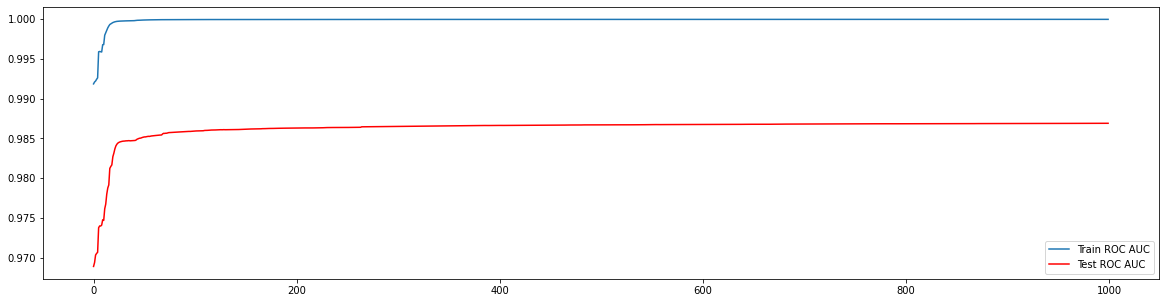

In [ ]:
plt.plot(train_roc, label='Train ROC AUC')
plt.plot(test_roc, label='Test ROC AUC', color='r')
plt.legend()

In [ ]:
y_pred = model.predict_proba(pool_test)

In [ ]:
roc_auc_score(y_test, y_pred[:,1])

0.98690425478267

#LR on top6 features

In [ ]:
cat_features_top_6 = [
                'date_action_y_m',
                'group_1',
                'char_3_person',
                'char_7_person',
                ]

In [ ]:
num_features_top_6 = ['char_38', 'pers_oper']

  0%|          | 0/100 [00:00<?, ?it/s]

Best Test ROC AUC = 0.9290569604517027
Best Train ROC AUC = 0.9616607382192878
Best Itre = 76


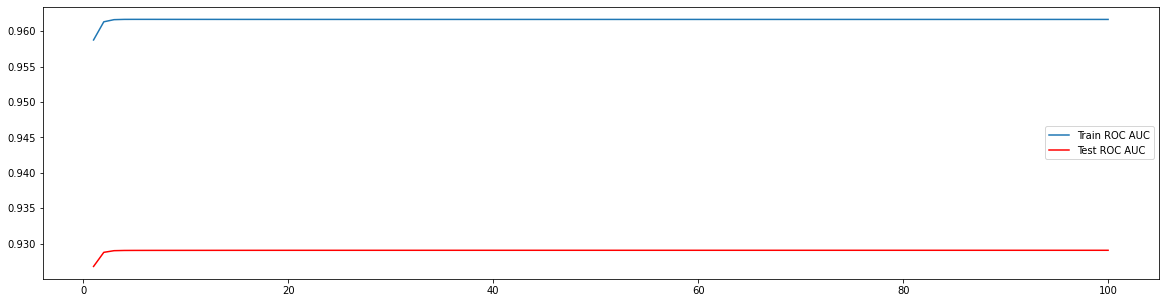

In [ ]:
f_imp_top_6, trans_top_6, lr_top_6 = make_lr(X_train, y_train, X_test, y_test, cat_features_top_6, num_features_top_6, iter=100)

Построви модель на топ 6 можно плоучить моедль сопоставимую по качеству с моделью логрегресии на всех прихнаках из обеих таблиц

#Predict

In [ ]:
person_df = pd.read_csv(person, index_col='Unnamed: 0')

In [ ]:
person_df['date'] = pd.to_datetime(person_df['date'])

In [ ]:
action_test_df = pd.read_csv(action_test, index_col='Unnamed: 0')

In [ ]:
action_test_df.head()

,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


In [ ]:
action_test_df['date'] = pd.to_datetime(action_test_df['date'])

In [ ]:
action_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498687 entries, 0 to 498686
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   person_id    498687 non-null  object        
 1   action_id    498687 non-null  object        
 2   date         498687 non-null  datetime64[ns]
 3   action_type  498687 non-null  object        
 4   char_1       40092 non-null   object        
 5   char_2       40092 non-null   object        
 6   char_3       40092 non-null   object        
 7   char_4       40092 non-null   object        
 8   char_5       40092 non-null   object        
 9   char_6       40092 non-null   object        
 10  char_7       40092 non-null   object        
 11  char_8       40092 non-null   object        
 12  char_9       40092 non-null   object        
 13  char_10      458595 non-null  object        
dtypes: datetime64[ns](1), object(13)
memory usage: 57.1+ MB


In [ ]:
action_test_df.isna().mean()

person_id      0.000000
action_id      0.000000
date           0.000000
action_type    0.000000
char_1         0.919605
char_2         0.919605
char_3         0.919605
char_4         0.919605
char_5         0.919605
char_6         0.919605
char_7         0.919605
char_8         0.919605
char_9         0.919605
char_10        0.080395
dtype: float64

In [ ]:
action_test_df[action_train_df['action_type']=='type 1'].isna().mean()

person_id      0.000000
action_id      0.000000
date           0.000000
action_type    0.000000
char_1         0.919268
char_2         0.919268
char_3         0.919268
char_4         0.919268
char_5         0.919268
char_6         0.919268
char_7         0.919268
char_8         0.919268
char_9         0.919268
char_10        0.080732
dtype: float64

In [ ]:
action_test_df[action_train_df['action_type']!='type 1'].isna().mean()

person_id      0.000000
action_id      0.000000
date           0.000000
action_type    0.000000
char_1         0.919632
char_2         0.919632
char_3         0.919632
char_4         0.919632
char_5         0.919632
char_6         0.919632
char_7         0.919632
char_8         0.919632
char_9         0.919632
char_10        0.080368
dtype: float64

In [ ]:
df_test = action_test_df.merge(person_df, how = 'inner', on='person_id', suffixes=('_action', '_person'),)

In [ ]:
df_test.columns

Index(['person_id', 'action_id', 'date_action', 'action_type', 'char_1_action',
       'char_2_action', 'char_3_action', 'char_4_action', 'char_5_action',
       'char_6_action', 'char_7_action', 'char_8_action', 'char_9_action',
       'char_10_action', 'char_1_person', 'group_1', 'char_2_person',
       'date_person', 'char_3_person', 'char_4_person', 'char_5_person',
       'char_6_person', 'char_7_person', 'char_8_person', 'char_9_person',
       'char_10_person', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
       'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
       'char_34', 'char_35', 'char_36', 'char_37', 'char_38'],
      dtype='object')

In [ ]:
action_test_df.shape, df_test.shape

((498687, 14), (498687, 54))

In [ ]:
df_test = df_test.fillna('unn')

In [ ]:
df_test['date_action_y_m'] = df_test['date_action'].values.astype('datetime64[M]')
df_test['date_action_y_m'] = df_test['date_action_y_m'].astype('str')

In [ ]:
df_test['date_person_y_m'] = df_test['date_person'].values.astype('datetime64[M]')
df_test['date_person_y_m'] = df_test['date_person_y_m'].astype('str')

In [ ]:
df_test['pers_oper'] = df_test['person_id'].apply(lambda x: person_id_count[x])

In [ ]:
drop = ['person_id',
        'action_id',
        'date_action',
        'date_person',
        ]

In [ ]:
pool_df_test = Pool(df_test.drop(drop, axis=1), cat_features=cat_features)
pool_df_test.shape

(498687, 53)

In [ ]:
df_test_pred = model.predict_proba(pool_df_test)
df_test_pred.shape

(498687, 2)

In [ ]:
ans = pd.DataFrame({'action_id':df_test['action_id'].copy(),
                    'result':pd.Series(df_test_pred[:,1])})
ans

,action_id,result
0,act1_249281,0.002112
1,act2_230855,0.001980
2,act1_240724,0.999122
3,act1_83552,0.971681
4,act2_1043301,0.999181
...,...,...
498682,act2_4367092,0.000006
498683,act2_4404220,0.000006
498684,act2_448830,0.000006
498685,act2_450133,0.000006


In [ ]:
ans.to_csv('/content/predict.csv', index=False)